In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r"/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv",index_col="id")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info() # bmi null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [5]:
df["ever_married"] = np.where(df["ever_married"]=="Yes",1,0)
df["gender"] = np.where(df["gender"]=="Male",0,1)
df_sub = pd.get_dummies(df,columns=["work_type","Residence_type","smoking_status"])

In [6]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
data_fill = pd.DataFrame(imputer.fit_transform(df_sub),columns=df_sub.columns)

In [7]:
data_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5110 non-null   float64
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   float64
 3   heart_disease                   5110 non-null   float64
 4   ever_married                    5110 non-null   float64
 5   avg_glucose_level               5110 non-null   float64
 6   bmi                             5110 non-null   float64
 7   stroke                          5110 non-null   float64
 8   work_type_Govt_job              5110 non-null   float64
 9   work_type_Never_worked          5110 non-null   float64
 10  work_type_Private               5110 non-null   float64
 11  work_type_Self-employed         5110 non-null   float64
 12  work_type_children              51

In [8]:
data_fill.describe()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.586106,43.226614,0.097456,0.054012,0.656164,106.147677,28.941640,0.048728,0.128571,0.004305,0.572407,0.160274,0.134442,0.491977,0.508023,0.302153,0.173190,0.370254,0.154403
std,0.492578,22.612647,0.296607,0.226063,0.475034,45.283560,7.768105,0.215320,0.334758,0.065480,0.494778,0.366896,0.341160,0.499985,0.499985,0.459236,0.378448,0.482920,0.361370
min,0.000000,0.080000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,77.245000,23.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,45.000000,0.000000,0.000000,1.000000,91.885000,28.200000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,114.090000,33.100000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9753eca510>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9753ecab90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9753eca150>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9753ed7290>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9753ed75d0>],
 'means': []}

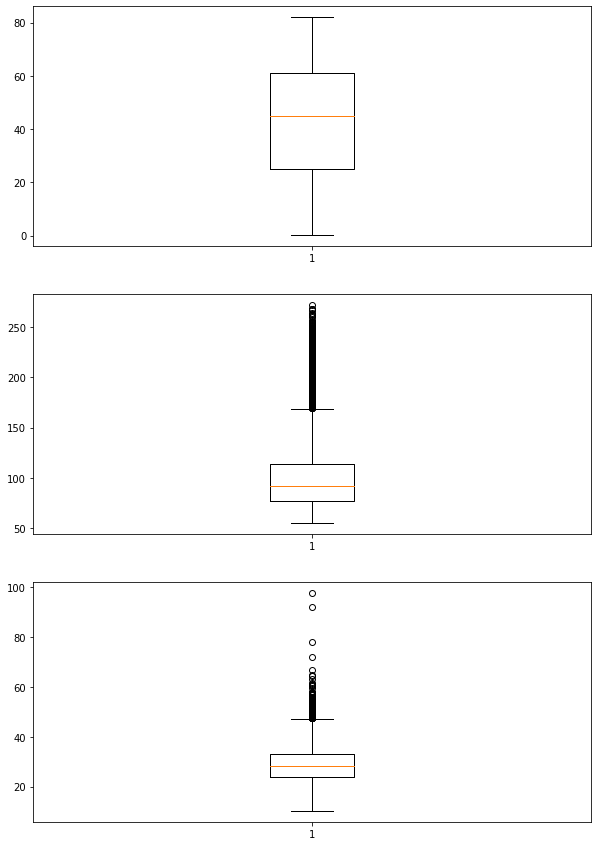

In [9]:
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
plt.boxplot(data=data_fill,x="age")
plt.subplot(3,1,2)
plt.boxplot(data=data_fill,x="avg_glucose_level")
plt.subplot(3,1,3)
plt.boxplot(data=data_fill,x="bmi")

In [10]:
import sklearn
from imblearn.over_sampling import SMOTE

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
X = data_fill.loc[:,~data_fill.columns.isin(["stroke"])]
y = data_fill["stroke"]

In [12]:
y.value_counts()

0.0    4861
1.0     249
Name: stroke, dtype: int64

In [13]:
ros = SMOTE()
X_smote, y_smote = ros.fit_resample(X,y)
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.3,stratify=y_smote,random_state=123)

In [14]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1459
         1.0       0.99      0.96      0.97      1458

    accuracy                           0.97      2917
   macro avg       0.97      0.97      0.97      2917
weighted avg       0.97      0.97      0.97      2917



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


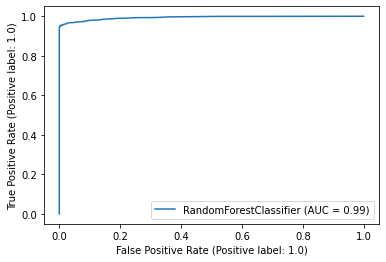

In [15]:
from sklearn.metrics import classification_report,plot_roc_curve
print(classification_report(y_test,y_pred))
plot_roc_curve(model,X_test,y_test)
plt.show()